In [ ]:
from difflib import get_close_matches

financial_terms = {
    'cash in hand': 'Cash',
    'ppe': 'Property, Plant, Equipment',
    'ar': 'Accounts receivable',
    'gross income': 'Gross Revenue'
}

def find_closest_term(s):
    ## get the close match with the financial terms
    closest_match = get_close_matches(s.lower(), financial_terms.keys(), n=1)
    # Check if it's a closest_match
    if closest_match:
        return financial_terms[closest_match[0]]
    else:
        return None

In [ ]:
input_term = input()
output_term = find_closest_term(input_term)
print(f"Closest financial term for '{input_term}': {output_term}")

In [1]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
folder_path = "Data"
files = os.listdir(folder_path)

# Initialize empty DataFrames for CY and PY
cy_df = pd.DataFrame()
py_df = pd.DataFrame()

for file in files:
    # Read data from the file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file))

    # Check if it's a CY or PY file
    if file.startswith('CY'):
        cy_df = pd.concat([cy_df, df], ignore_index=True)
    elif file.startswith('PY'):
        py_df = pd.concat([py_df, df], ignore_index=True)

# Export the combined DataFrames to CSV files
cy_df.to_csv('Data/CY_full_year.csv', index=False)
py_df.to_csv('Data/PY_full_year.csv', index=False)


In [4]:
cy_df = pd.read_csv('Data/CY_full_year.csv')
py_df = pd.read_csv('Data/PY_full_year.csv')

df = pd.concat([cy_df, py_df], ignore_index=True)

In [5]:
def cash_in_out(amount):
    if amount > 0:
        return 'Cash in'
    elif amount < 0:
        return 'Cash out'
    else:
        return 'N/A'  # Or any other value for zero amounts

# Create a new column "Cash in/Cash out" using the custom function
df['Reporting Amount'] = df['Reporting Amount'].astype(float)
df['Cash in/Cash out'] = df['Reporting Amount'].apply(cash_in_out)

In [6]:
# Group by "Account Numbers" and calculate the sum of absolute "Reporting Amount"
account_sums = df.groupby('Account Number')['Reporting Amount'].apply(lambda x: x.abs().sum())

top_accounts = account_sums.nlargest(10)
print(top_accounts)

Account Number
4    33731.0
3    31054.0
1     3838.0
2     1147.0
Name: Reporting Amount, dtype: float64


In [7]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Quarter'] = df['Transaction Date'].dt.quarter

In [8]:
df.head()

,Account Number,Transaction Date,Reporting Amount,Purpose,Cash in/Cash out,Quarter
0,2,2024-12-08,10.0,A,Cash in,4
1,2,2024-12-08,-10.0,A,Cash out,4
2,2,2024-12-09,5.0,A,Cash in,4
3,2,2024-12-10,3.0,A,Cash in,4
4,2,2024-12-11,2.0,A,Cash in,4


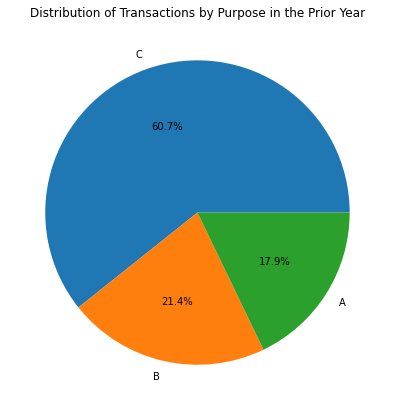

In [9]:
purpose_counts = py_df['Purpose'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Transactions by Purpose in the Prior Year')
plt.show()


Key economic indicators that data analysts should monitor to assess the overall health and stability of an economy include:

Gross Domestic Product (GDP): GDP measures the total value of all goods and services produced within a country's borders. It provides insight into the overall economic output and growth of an economy.

Unemployment Rate: The unemployment rate reflects the percentage of the labor force that is unemployed and actively seeking employment. It indicates the health of the labor market and can signal changes in consumer spending and overall economic activity.

Inflation Rate: Inflation measures the rate at which the general level of prices for goods and services is rising. It affects purchasing power, interest rates, and investment decisions, making it a crucial indicator for assessing economic stability.

Consumer Confidence Index (CCI): CCI measures consumers' sentiment and outlook on current economic conditions and future expectations. It influences consumer spending behavior and overall economic growth.

Industrial Production Index (IPI): IPI tracks the output of manufacturing, mining, and utilities sectors. It provides insights into the health of the industrial sector and overall production activity.

Retail Sales: Retail sales data measures the total receipts from stores selling merchandise and services to consumers. It reflects consumer spending patterns and sentiment, which are key drivers of economic growth.

Housing Market Indicators: These include metrics such as housing starts, home prices, and mortgage rates. They provide insights into the health of the real estate market, consumer wealth, and overall economic activity.

Data analytics can be used to extract meaningful insights from these economic indicators in several ways:

Time Series Analysis: Analyzing historical data over time can identify trends, patterns, and cyclical fluctuations in economic indicators. This information helps forecast future trends and make informed decisions.

Correlation Analysis: Identifying correlations between economic indicators and other variables, such as consumer behavior, employment trends, or financial market performance, can provide valuable insights into cause-and-effect relationships.

Predictive Modeling: Building predictive models using economic indicators as input variables can forecast future economic conditions, consumer behavior, and market trends. These models enable businesses to anticipate changes and adjust strategies accordingly.

Sentiment Analysis: Analyzing textual data from sources such as social media, news articles, and surveys can gauge public sentiment and opinions about the economy. Sentiment analysis provides additional context to quantitative data and helps understand consumer behavior and market sentiment.

Economic Impact Assessments: Assessing the potential impact of policy changes, economic events, or external factors on economic indicators can inform decision-making and risk management strategies for businesses and policymakers.

Overall, data analytics enables businesses, policymakers, and analysts to gain deeper insights into economic indicators, identify emerging trends and risks, and make data-driven decisions to navigate economic uncertainties and capitalize on opportunities.